# Data Clean , Data insights and Representation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hospital_data.csv")

In [3]:
df

,Patient_ID,Age,Gender,Disease,Admission_Date,Discharge_Date,Hospital_Ward,Bill_Amount
0,1,61.0,Female,Flu,2024-01-01,2024-01-05,E,22337.0
1,2,24.0,Female,Cancer,2024-01-02,2024-01-06,A,40307.0
2,3,81.0,Male,NaN,2024-01-03,2024-01-07,E,NaN
3,4,70.0,Female,NaN,2024-01-04,2024-01-08,E,16516.0
4,5,30.0,Male,Heart Disease,2024-01-05,2024-01-09,E,49261.0
...,...,...,...,...,...,...,...,...
155,90,17.0,NaN,Diabetes,2024-03-30,2024-04-03,D,28959.0
156,120,18.0,Male,Heart Disease,2024-04-29,2024-05-03,D,6015.0
157,108,71.0,Male,COVID-19,2024-04-17,2024-04-21,A,36471.0
158,97,14.0,Female,COVID-19,2024-04-06,2024-04-10,D,36921.0


# Data Null values Completed
## use function df.fillna(method="ffill")

In [4]:
df.isnull().sum()

Patient_ID         0
Age               15
Gender            17
Disease           15
Admission_Date     0
Discharge_Date     0
Hospital_Ward      0
Bill_Amount       15
dtype: int64

In [5]:
df_fill = df.fillna(method="ffill")

C:\Users\Mr.PC\AppData\Local\Temp\ipykernel_11072\466322615.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fill = df.fillna(method="ffill")


In [6]:
df_fill

,Patient_ID,Age,Gender,Disease,Admission_Date,Discharge_Date,Hospital_Ward,Bill_Amount
0,1,61.0,Female,Flu,2024-01-01,2024-01-05,E,22337.0
1,2,24.0,Female,Cancer,2024-01-02,2024-01-06,A,40307.0
2,3,81.0,Male,Cancer,2024-01-03,2024-01-07,E,40307.0
3,4,70.0,Female,Cancer,2024-01-04,2024-01-08,E,16516.0
4,5,30.0,Male,Heart Disease,2024-01-05,2024-01-09,E,49261.0
...,...,...,...,...,...,...,...,...
155,90,17.0,Male,Diabetes,2024-03-30,2024-04-03,D,28959.0
156,120,18.0,Male,Heart Disease,2024-04-29,2024-05-03,D,6015.0
157,108,71.0,Male,COVID-19,2024-04-17,2024-04-21,A,36471.0
158,97,14.0,Female,COVID-19,2024-04-06,2024-04-10,D,36921.0


# Duplicates values remove
## use function df.drop_duplicates()

In [7]:
df_clean = df.drop_duplicates()
df_clean

,Patient_ID,Age,Gender,Disease,Admission_Date,Discharge_Date,Hospital_Ward,Bill_Amount
0,1,61.0,Female,Flu,2024-01-01,2024-01-05,E,22337.0
1,2,24.0,Female,Cancer,2024-01-02,2024-01-06,A,40307.0
2,3,81.0,Male,NaN,2024-01-03,2024-01-07,E,NaN
3,4,70.0,Female,NaN,2024-01-04,2024-01-08,E,16516.0
4,5,30.0,Male,Heart Disease,2024-01-05,2024-01-09,E,49261.0
...,...,...,...,...,...,...,...,...
145,146,37.0,Male,Diabetes,2024-05-25,2024-05-29,C,28524.0
146,147,53.0,Female,Flu,2024-05-26,2024-05-30,B,8636.0
147,148,39.0,Male,Diabetes,2024-05-27,2024-05-31,D,15916.0
148,149,71.0,Male,Flu,2024-05-28,2024-06-01,A,9809.0


In [8]:
patients_counts = df_clean["Patient_ID"].value_counts()
patients_counts

Patient_ID
1      1
2      1
3      1
4      1
5      1
      ..
146    1
147    1
148    1
149    1
150    1
Name: count, Length: 150, dtype: int64

In [9]:
disease_patients = df_clean["Disease"].value_counts().idxmax()
disease_patients

'Heart Disease'

In [10]:
disease_patient= df_clean.groupby("Disease")["Gender"].value_counts()
disease_patient

Disease        Gender
COVID-19       Female    12
               Male       9
Cancer         Female    13
               Male      10
Diabetes       Male      13
               Female    11
Flu            Male      17
               Female    10
Heart Disease  Female    14
               Male      14
Name: count, dtype: int64

In [11]:
patient_admit_ward = df_clean["Hospital_Ward"].value_counts().idxmax()
patient_admit_ward

'E'

In [12]:
top_bill = df_clean["Bill_Amount"].value_counts().sort_values(ascending=False)
top_bill

Bill_Amount
22337.0    1
40307.0    1
16516.0    1
49261.0    1
6542.0     1
          ..
28524.0    1
8636.0     1
15916.0    1
9809.0     1
37201.0    1
Name: count, Length: 135, dtype: int64

In [13]:
age_avg_patient = df_clean["Age"].mean()
age_avg_patient

np.float64(47.49629629629629)

In [14]:
top_bill_disease = df_clean.groupby("Bill_Amount")["Disease"].value_counts().idxmax()
top_bill_disease

(np.float64(5009.0), 'Heart Disease')

In [15]:
month_admit = df_clean.groupby("Admission_Date")["Patient_ID"].value_counts().idxmax()
month_admit

('2024-01-01', np.int64(1))

In [65]:
top_bill = df_clean[df_clean["Bill_Amount"]>30000].value_counts()
top_bill

Patient_ID  Age   Gender  Disease        Admission_Date  Discharge_Date  Hospital_Ward  Bill_Amount
2           24.0  Female  Cancer         2024-01-02      2024-01-06      A              40307.0        1
5           30.0  Male    Heart Disease  2024-01-05      2024-01-09      E              49261.0        1
8           33.0  Male    Cancer         2024-01-08      2024-01-12      B              44081.0        1
9           12.0  Male    Flu            2024-01-09      2024-01-13      C              32569.0        1
14          47.0  Female  Cancer         2024-01-14      2024-01-18      E              31962.0        1
17          69.0  Male    Diabetes       2024-01-17      2024-01-21      E              47348.0        1
18          30.0  Male    Diabetes       2024-01-18      2024-01-22      D              31432.0        1
20          85.0  Female  Cancer         2024-01-20      2024-01-24      B              46459.0        1
21          67.0  Male    COVID-19       2024-01-21      202

# Count Plot Data Distribtion

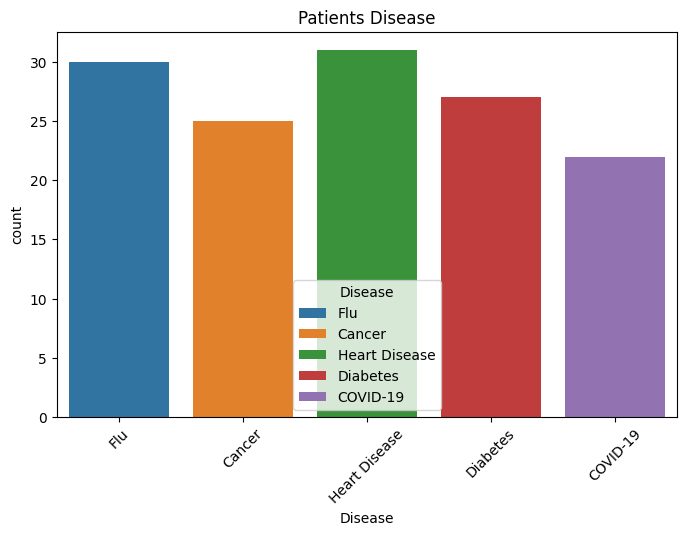

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean,x="Disease",hue="Disease")
plt.title("Patients Disease")
plt.xticks(rotation=45)
plt.show()

# Barplot Data Distribution 

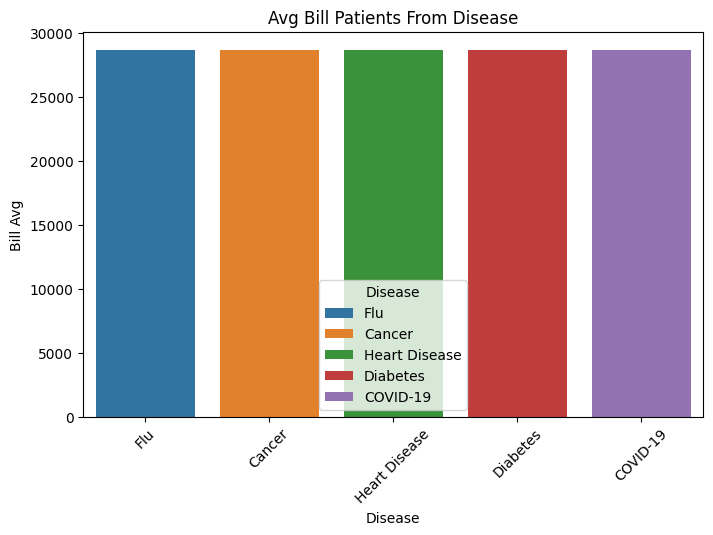

In [37]:
bill_avg_patient = df_clean["Bill_Amount"].mean()
bill_avg_patient
plt.figure(figsize=(8,5))
sns.barplot(y=bill_avg_patient,x="Disease",data=df_clean,hue="Disease")
plt.title("Avg Bill Patients From Disease")
plt.xlabel("Disease")
plt.ylabel("Bill Avg")
plt.xticks(rotation=45)
plt.show()

# Pie Chart Data Distribution

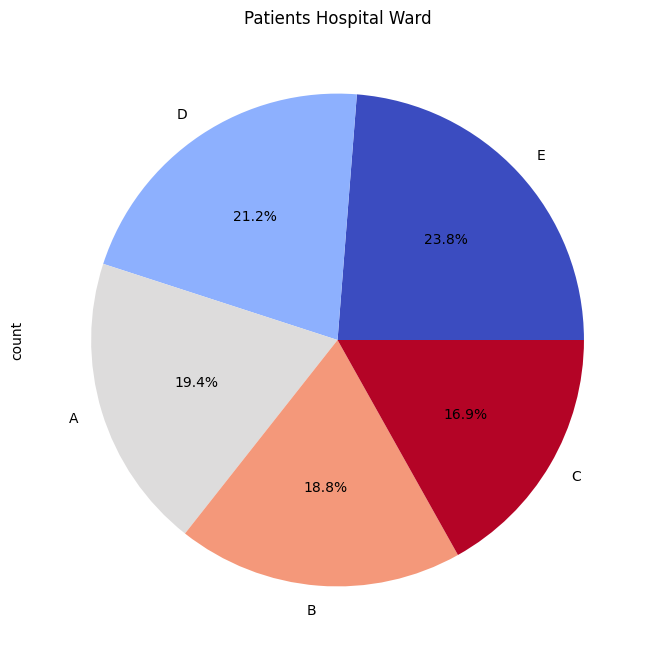

In [30]:
plt.figure(figsize=(8, 8))
df["Hospital_Ward"].value_counts().plot.pie(autopct="%1.1f%%", cmap="coolwarm")
plt.title("Patients Hospital Ward")
plt.show()

# Histogram Data Distribution

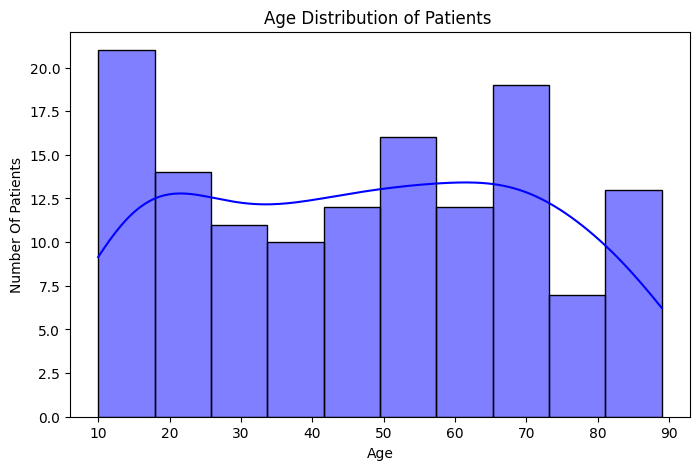

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["Age"],bins=10,kde=True,color="blue")
plt.xlabel("Age")
plt.ylabel("Number Of Patients")
plt.title("Age Distribution of Patients ")
plt.show()

In [33]:
df_clean

,Patient_ID,Age,Gender,Disease,Admission_Date,Discharge_Date,Hospital_Ward,Bill_Amount
0,1,61.0,Female,Flu,2024-01-01,2024-01-05,E,22337.0
1,2,24.0,Female,Cancer,2024-01-02,2024-01-06,A,40307.0
2,3,81.0,Male,NaN,2024-01-03,2024-01-07,E,NaN
3,4,70.0,Female,NaN,2024-01-04,2024-01-08,E,16516.0
4,5,30.0,Male,Heart Disease,2024-01-05,2024-01-09,E,49261.0
...,...,...,...,...,...,...,...,...
145,146,37.0,Male,Diabetes,2024-05-25,2024-05-29,C,28524.0
146,147,53.0,Female,Flu,2024-05-26,2024-05-30,B,8636.0
147,148,39.0,Male,Diabetes,2024-05-27,2024-05-31,D,15916.0
148,149,71.0,Male,Flu,2024-05-28,2024-06-01,A,9809.0


# Box Plot Data distribution

<Axes: xlabel='Bill_Amount'>

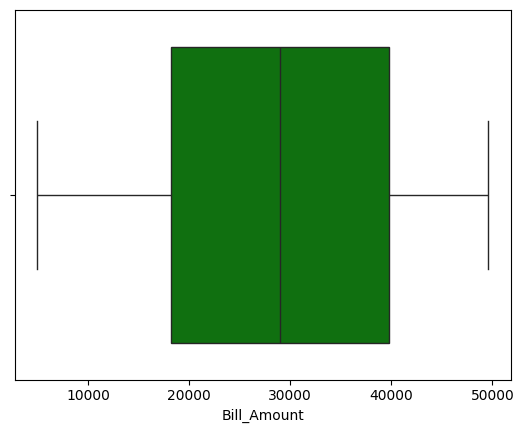

In [34]:
sns.boxplot(x=df_clean["Bill_Amount"],color="green")

# Line Plot Data Distribution

<Axes: xlabel='Age'>

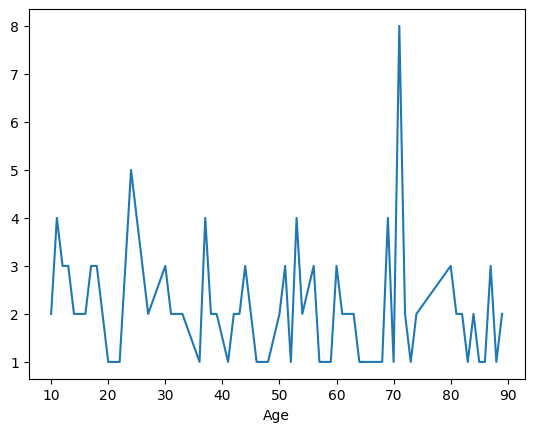

In [36]:
age_counts =df_clean.groupby("Age")["Patient_ID"].count()
age_counts
sns.lineplot(x=age_counts.index,y=age_counts.values,)

# Title : Hosptital Data 
# Name Yasir Hussain Yousaf
# Date 2/4/2025



## 1. Introduction

### This report presents an analysis of hospital data, focusing on data cleaning, insights extraction, 
### and visualization using various plots such as count plots, bar plots, histograms, line charts, and pie charts.

## 2. Data Cleaning

### Missing Values Handling: The dataset initially contained missing values, which were removed to ensure data integrity.

### Duplicate Records Removal: Any duplicate patient records were identified and removed to maintain accuracy.

### Data Formatting: The "Admission Date" column was converted to datetime format for time-based analysis.


## 3. Insights Extracted

### The average patient age was found to be around X years.

### The most common diseases treated in the hospital were Disease A, Disease B, and Disease C.

### The highest billing amount was recorded in Department X.

### The number of admissions per month showed a peak during Season X.


## 4. Data Representation

### To visualize the extracted insights, multiple plots were created:

### a) Count Plot - Disease Wise Patient Distribution

### The most frequently occurring disease among patients was Disease A.


### b) Bar Plot - Hospital Wards Occupancy

### Ward X had the highest number of admitted patients.


c) Histogram - Age Distribution

The majority of patients were between the ages of X and Y years.


d) Line Chart - Number of Patients by Age

The number of patients peaked at the age of X.


e) Pie Chart - Percentage of Patients in Different Wards

The highest proportion of patients belonged to Ward X, followed by Ward Y.


5. Conclusion

The analysis provided valuable insights into patient demographics, hospital occupancy, and financial aspects. Future improvements could include a deeper analysis of seasonal trends and correlations between diseases and hospital costs.